# Decision tree project: diabetes prediction

## Notebook set-up

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier

pd.set_option('display.max_columns', None)

## 1. Data preparation

### 1.1. Load data from URL

In [2]:
# Your code here
data = 'https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv'
dataFramed = pd.read_csv(data)
dataFramed.drop_duplicates().reset_index(drop=True, inplace=True)


### 1.2. Inspect

In [3]:
# Your code here
dataFramed.head(21)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0             6      148             72             35        0  33.6   
1             1       85             66             29        0  26.6   
2             8      183             64              0        0  23.3   
3             1       89             66             23       94  28.1   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
6             3       78             50             32       88  31.0   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   
11           10      168             74              0        0  38.0   
12           10      139             80              0        0  27.1   
13            1      189             60             23      846  30.1   
14            5      166             72             19      175  25.8   
15            7      100              0              0        0  30.0   
16            0      118             84             47      230  45.8   
17            7      107             74              0        0  29.6   
18            1      103             30             38       83  43.3   
19            1      115             70             30       96  34.6   
20            3      126             88             41      235  39.3   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
1                      0.351   31        0  
2                      0.672   32        1  
3                      0.167   21        0  
4                      2.288   33        1  
5                      0.201   30        0  
6                      0.248   26        1  
7                      0.134   29        0  
8                      0.158   53        1  
9                      0.232   54        1  
10                     0.191   30        0  
11                     0.537   34        1  
12                     1.441   57        0  
13                     0.398   59        1  
14                     0.587   51        1  
15                     0.484   32        1  
16                     0.551   31        1  
17                     0.254   31        1  
18                     0.183   33        0  
19                     0.529   32        1  
20                     0.704   27        0

In [4]:
dataFramed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
dataFramed.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [6]:
cols_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_check:
    print(f"{col} - count of zeros: {(dataFramed[col] == 0).sum()}")

Glucose - count of zeros: 5
BloodPressure - count of zeros: 35
SkinThickness - count of zeros: 227
Insulin - count of zeros: 374
BMI - count of zeros: 11


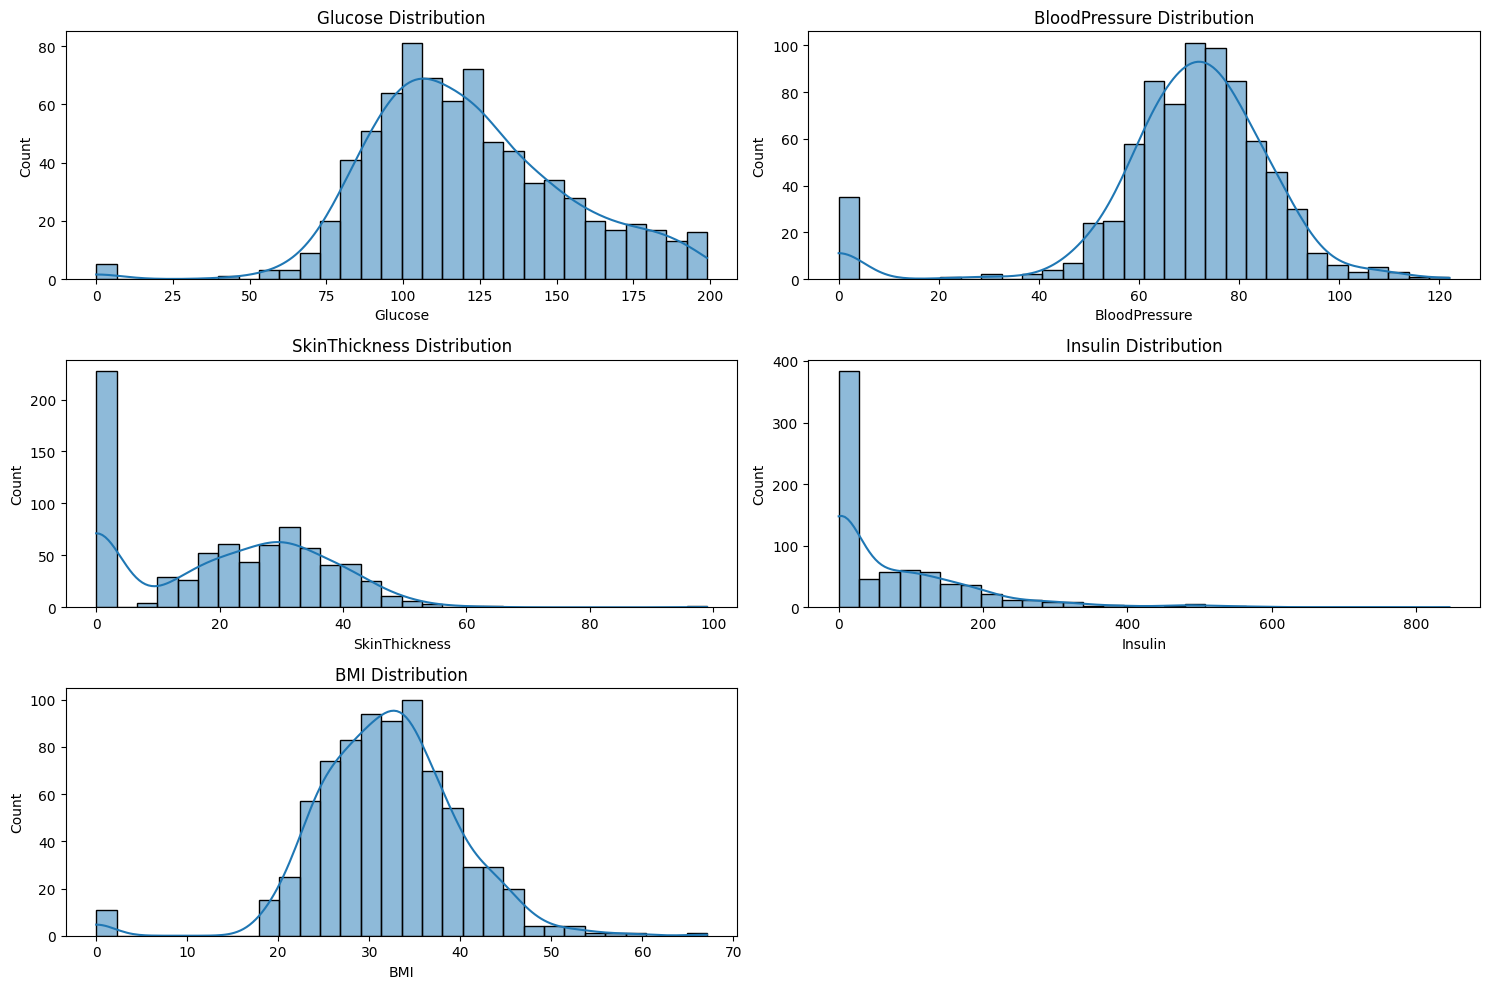

In [7]:
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
plt.figure(figsize=(15, 10))

for idx, feature in enumerate(features):
    plt.subplot(3, 2, idx + 1)
    sns.histplot(dataFramed[feature], kde=True, bins=30)
    plt.title(f'{feature} Distribution')

plt.tight_layout()
plt.show()

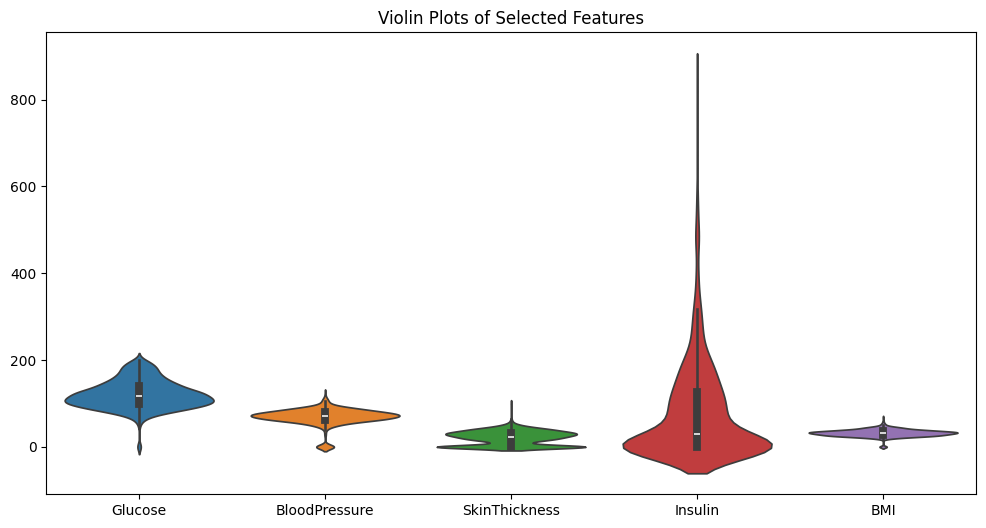

In [8]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=dataFramed[features])
plt.title("Violin Plots of Selected Features")
plt.show()

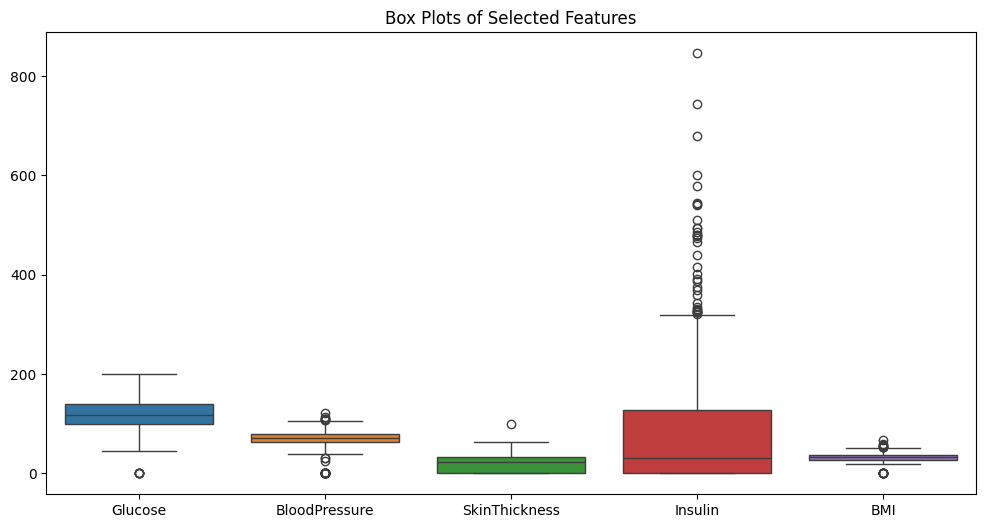

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dataFramed[features])
plt.title("Box Plots of Selected Features")
plt.show()


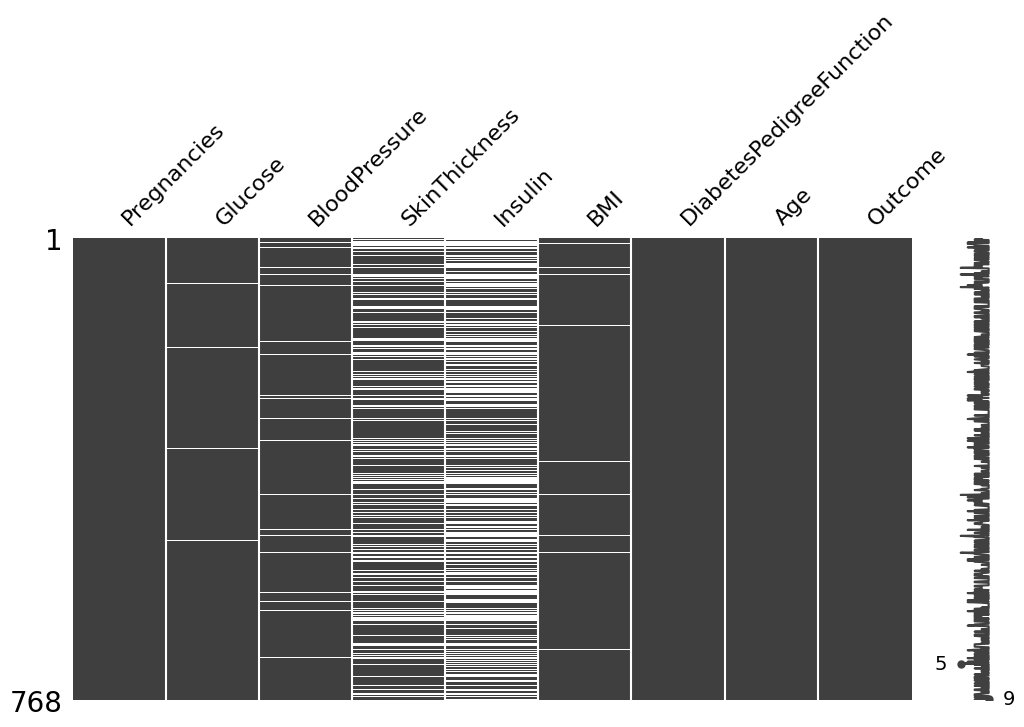

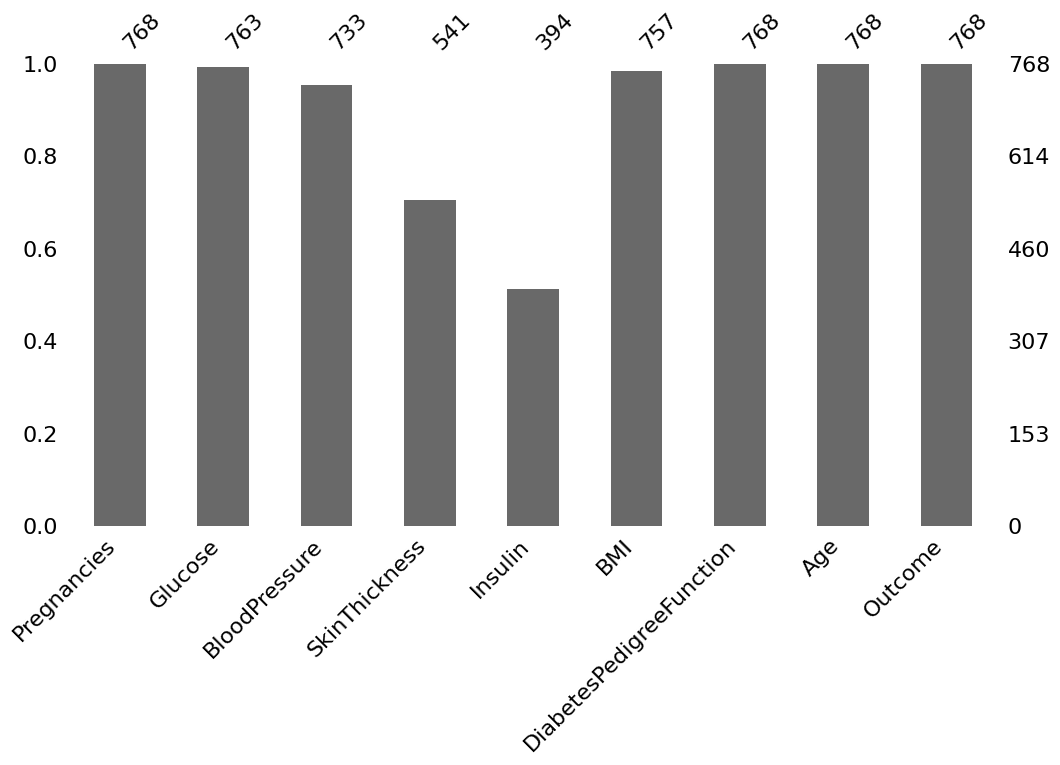

In [10]:
import missingno as msno

# Temporarily replace zeros with NaN for visualization purposes
temp_data = dataFramed.copy()
for feature in features:
    temp_data[feature] = temp_data[feature].replace(0, np.nan)

# Missing data matrix
msno.matrix(temp_data, figsize=(12, 6))
plt.show()

# Missing data bar plot
msno.bar(temp_data, figsize=(12, 6))
plt.show()


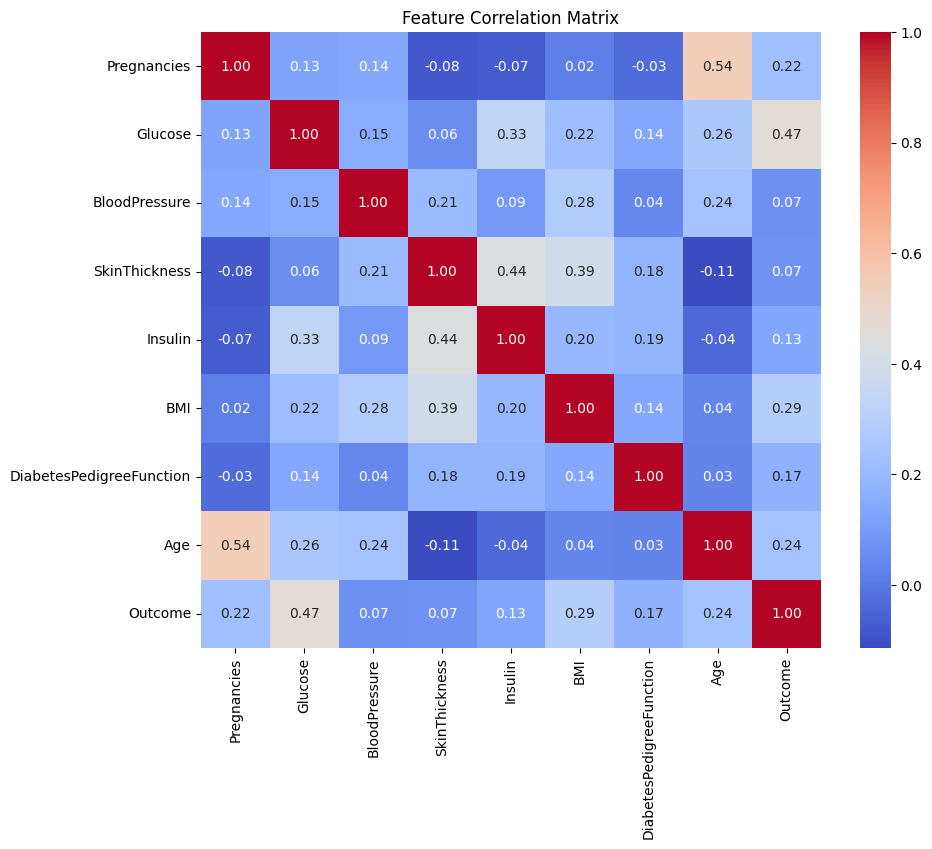

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataFramed.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

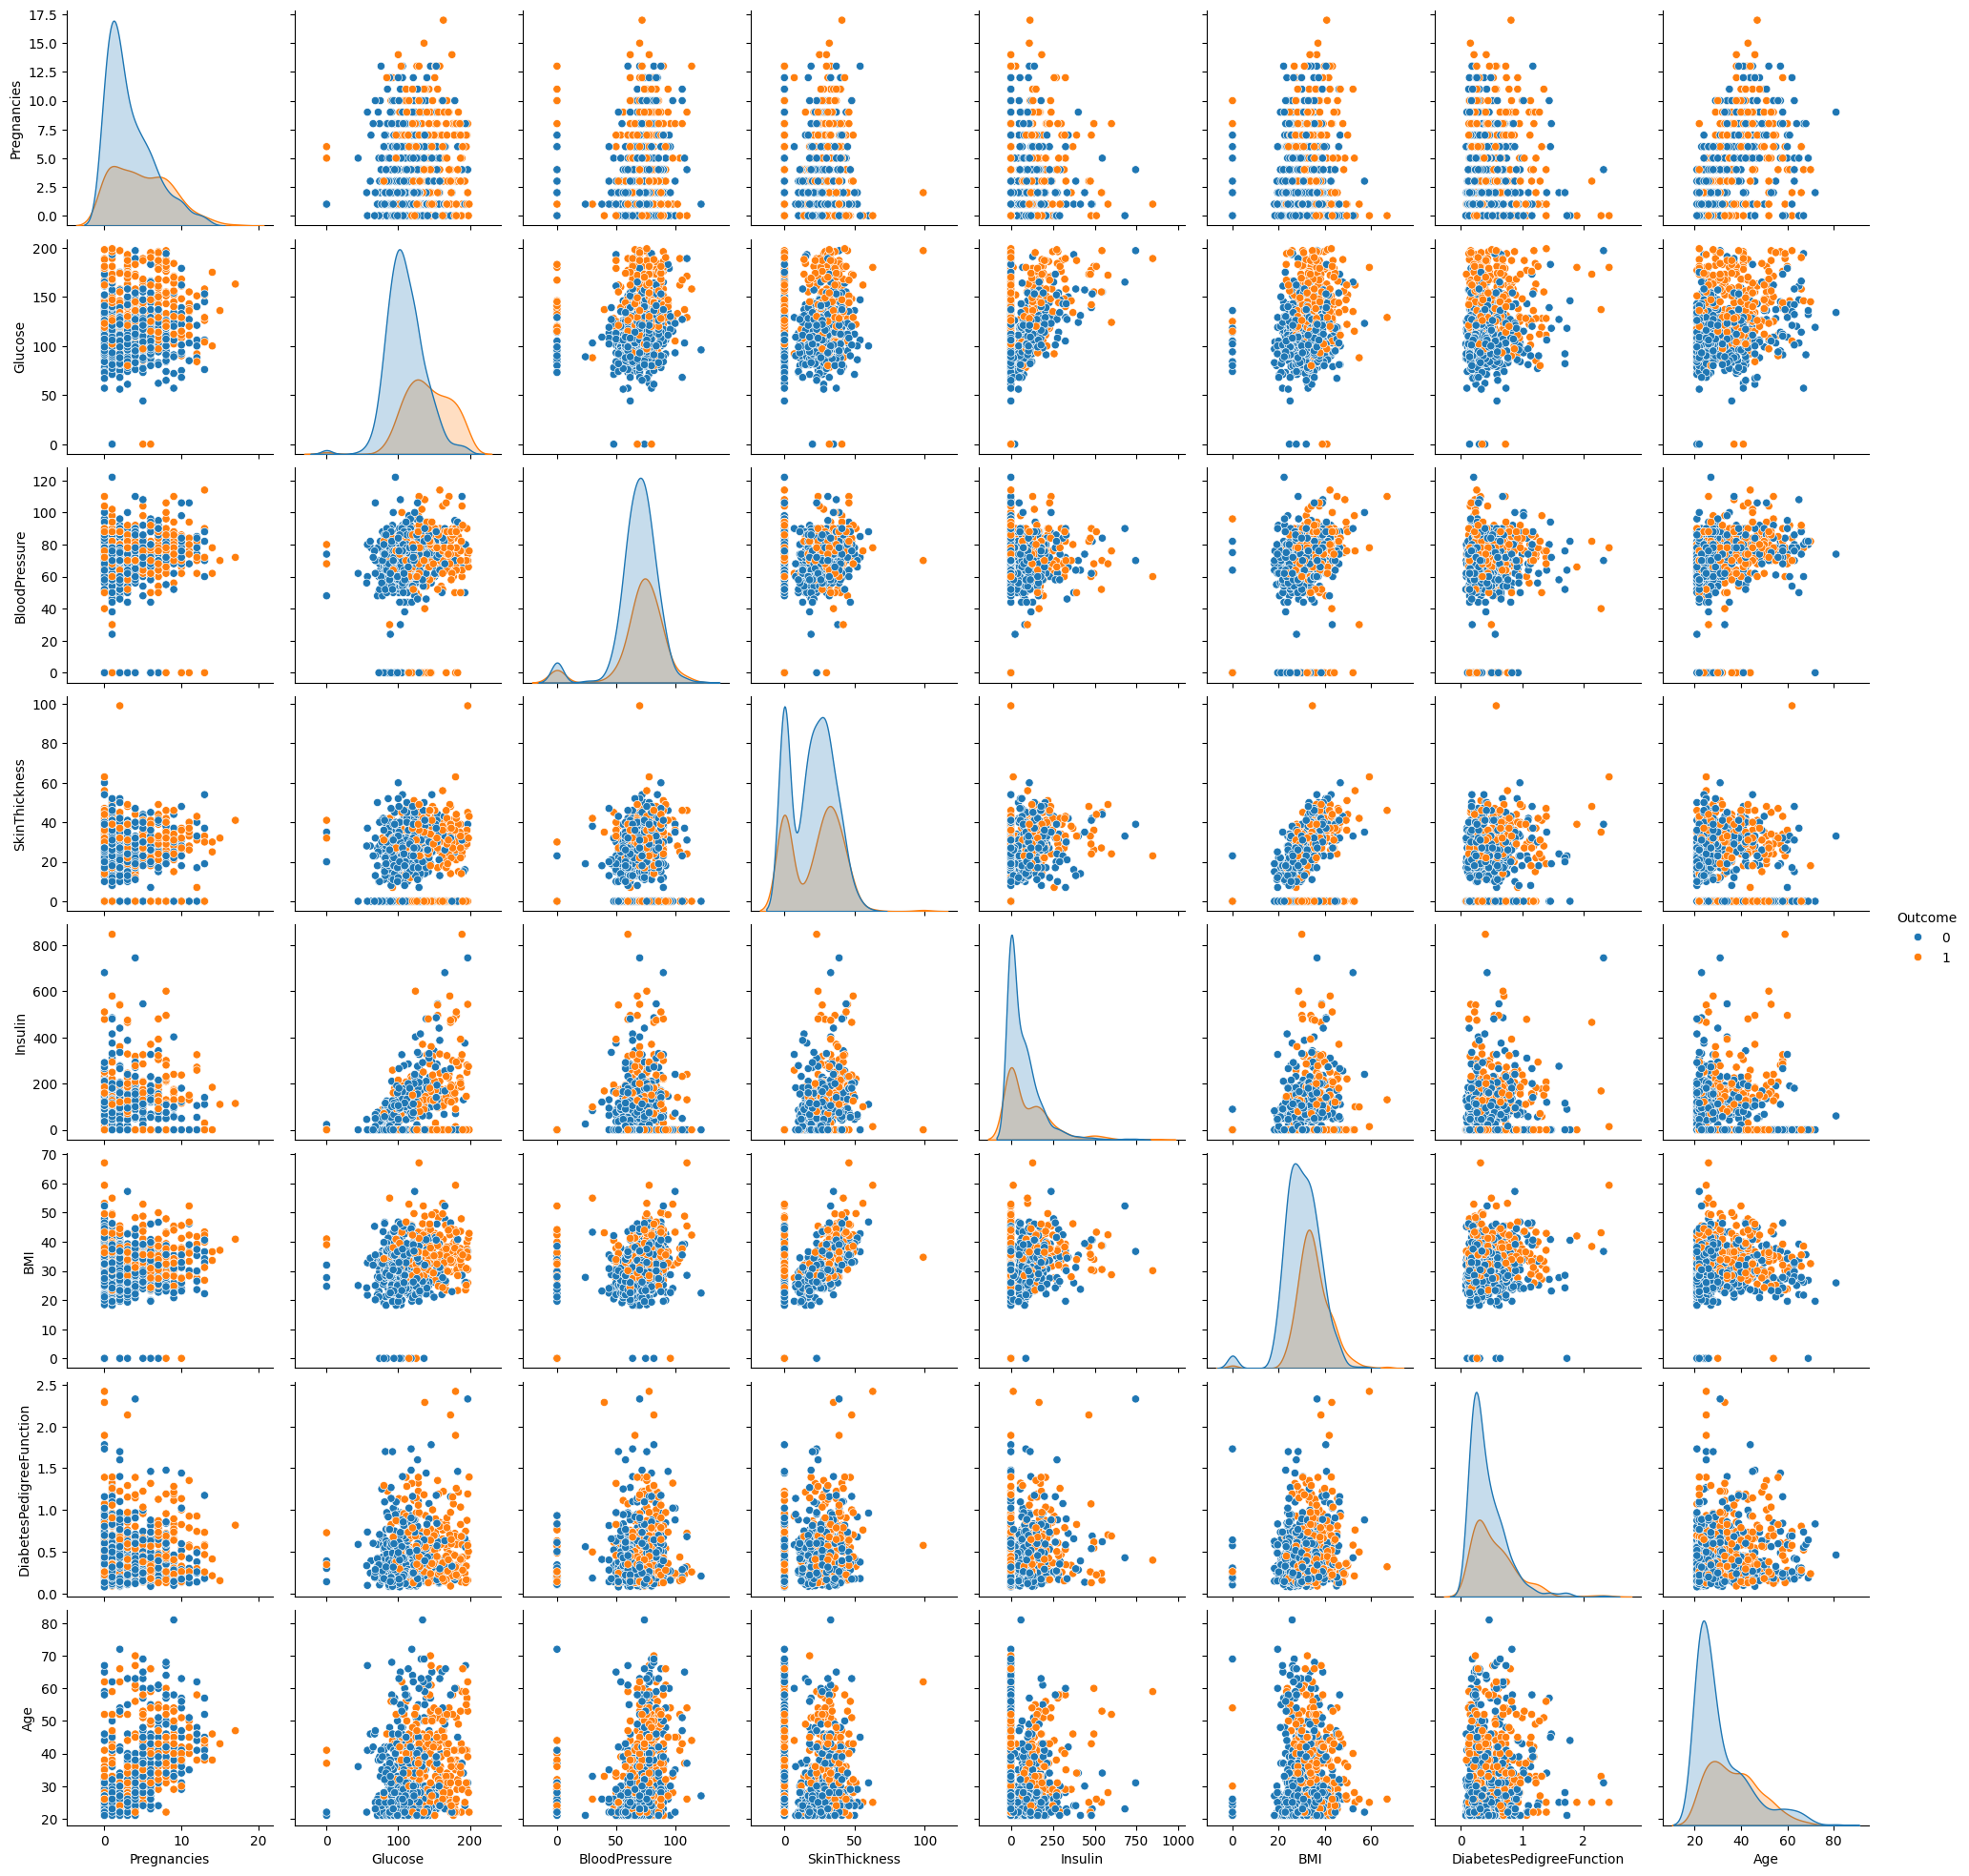

In [12]:
sns.pairplot(dataFramed, hue='Outcome', diag_kind='kde')
plt.show()

In [13]:
imputeFeatures = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for impute in imputeFeatures:
    dataFramed[impute] = dataFramed[impute].replace(0, np.nan)

print(dataFramed.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [14]:
imputer = KNNImputer(n_neighbors=5)
dataFramed[imputeFeatures] = imputer.fit_transform(dataFramed[imputeFeatures])


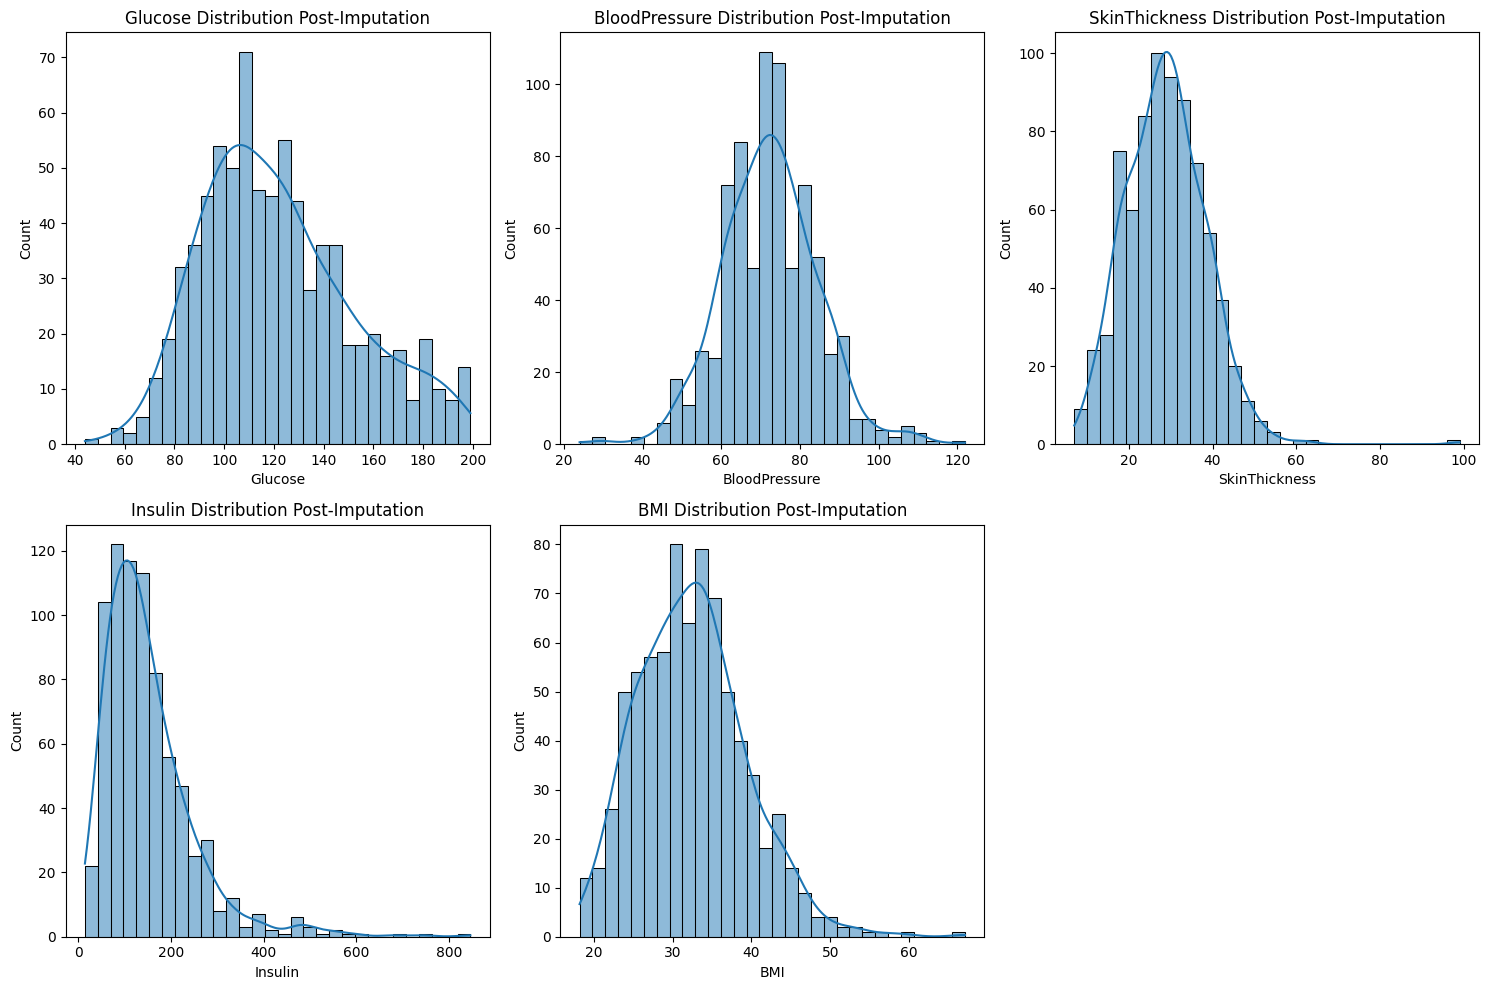

In [15]:
plt.figure(figsize=(15, 10))
for idx, impute in enumerate(imputeFeatures):
    plt.subplot(2, 3, idx+1)
    sns.histplot(dataFramed[impute], kde=True, bins=30)
    plt.title(f"{impute} Distribution Post-Imputation")
plt.tight_layout()
plt.show()


### 1.3. Test-train split

In [16]:
# Your code here
X = dataFramed.drop('Outcome', axis=1)
y = dataFramed['Outcome']

X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42, stratify=y)

## 2. EDA
### 2.1. Baseline model performance

In [17]:
# Your code here... Note: a logistic regression model gets ~77% training accuracy on the 'raw' data.
logReg = LogisticRegression(max_iter=1000, random_state=42)
logReg.fit(X_train, y_train)

logReg_train_acc = logReg.score(X_train, y_train)
logReg_test_acc = logReg.score(X_test, y_test)

print(f"Logistic Regression -> Training Accuracy: {logReg_train_acc:.4f}, Testing Accuracy: {logReg_test_acc:.4f}")

print("\nClassification Report on Test Data:")
print(classification_report(y_test, logReg.predict(X_test)))

Logistic Regression -> Training Accuracy: 0.7980, Testing Accuracy: 0.6948

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.75      0.80      0.77       100
           1       0.57      0.50      0.53        54

    accuracy                           0.69       154
   macro avg       0.66      0.65      0.65       154
weighted avg       0.69      0.69      0.69       154



## 2.2. Feature distributions and cleaning

### 2.2.1. Distribution plots

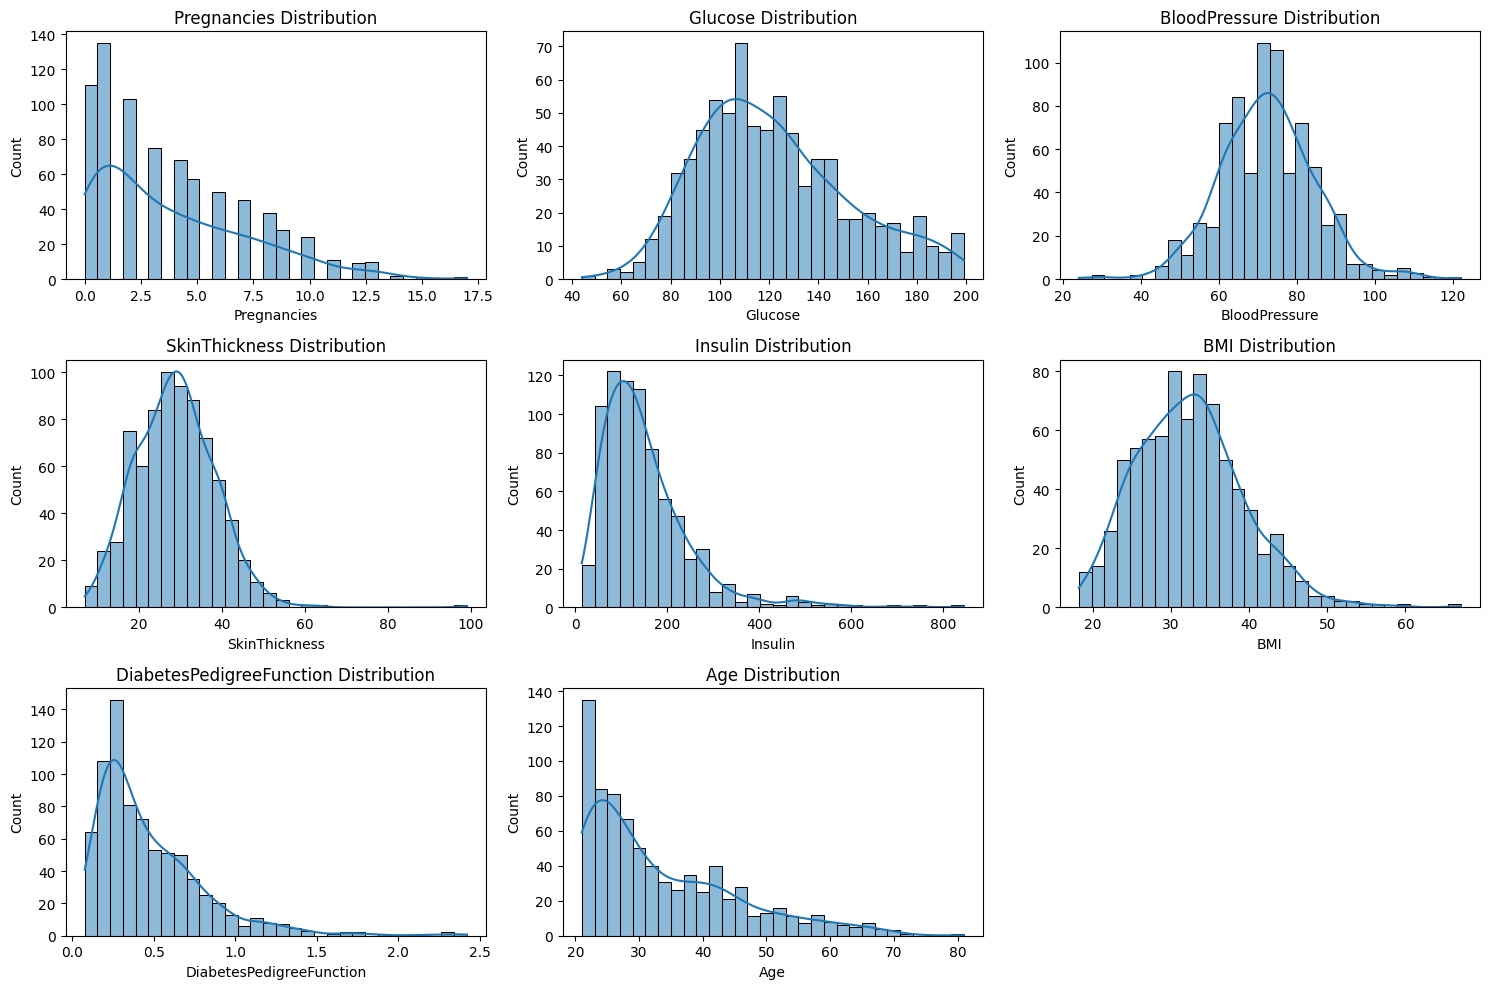

In [18]:
# Your code here... Watch out for missing data hiding in plain sight, 'nan' is not the only way missing values show up!

# Plotting distributions for each numeric feature
features = X.columns
plt.figure(figsize=(15, 10))
for idx, feature in enumerate(features):
    plt.subplot(3, 3, idx+1)
    sns.histplot(dataFramed[feature], kde=True, bins=30)
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()


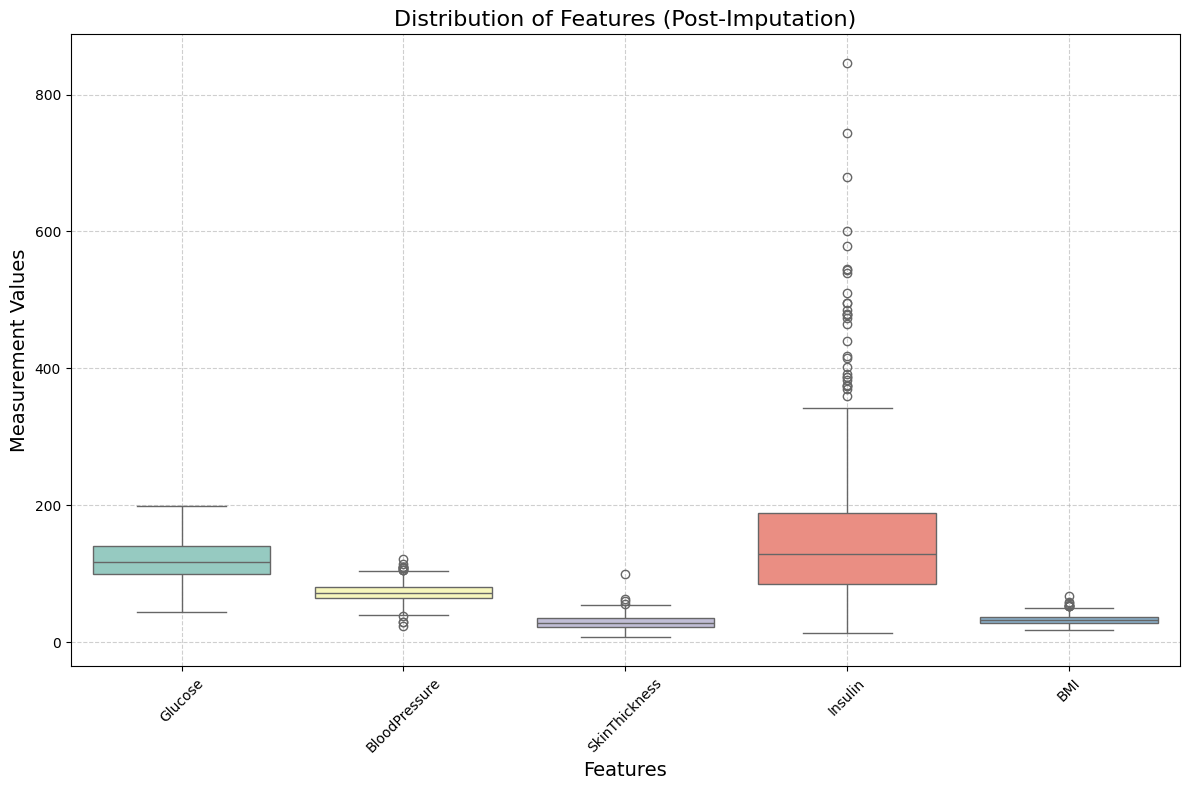

In [19]:
# List of features to visualize (after imputation)
features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Create an aggregated boxplot for all selected features
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataFramed[features], palette='Set3')

# Titles and labels
plt.title("Distribution of Features (Post-Imputation)", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Measurement Values", fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Optional: Improve grid appearance
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


### 2.2.2. Missing data

In [20]:
# Your code here...

### 2.3. Feature interactions & selection

#### 2.3.1. Feature cross-correlations

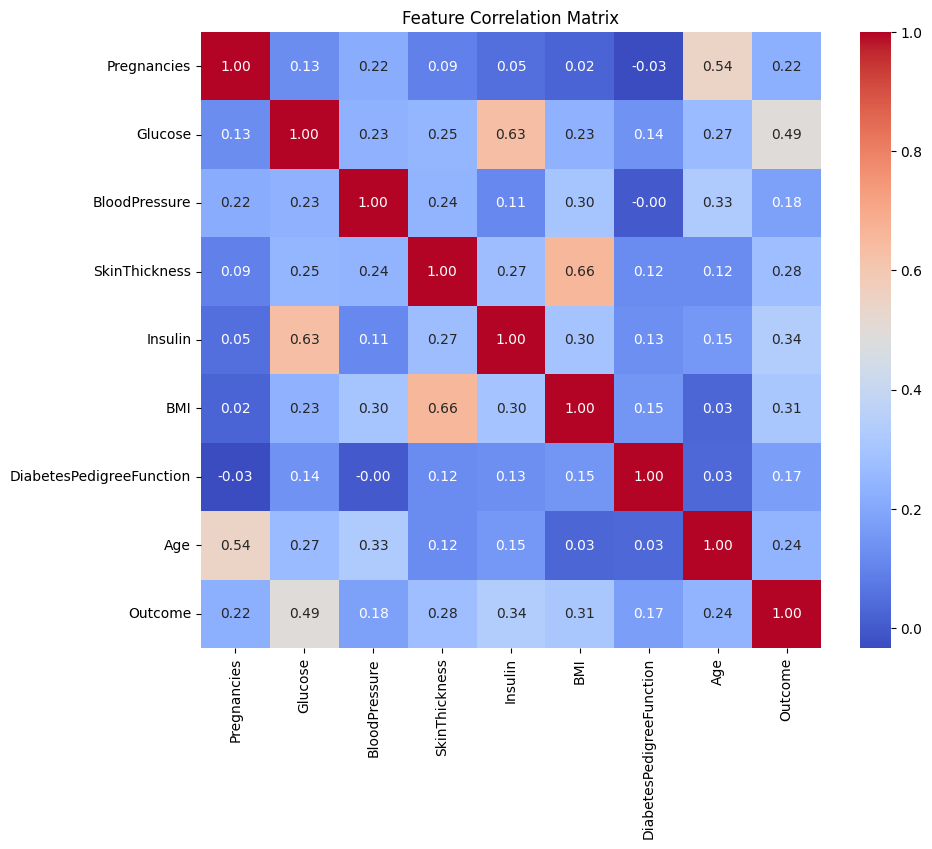

In [21]:
# Your code here...
# Recompute correlation on the cleaned data
corr_matrix = dataFramed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


#### 2.3.2. Feature-label interactions

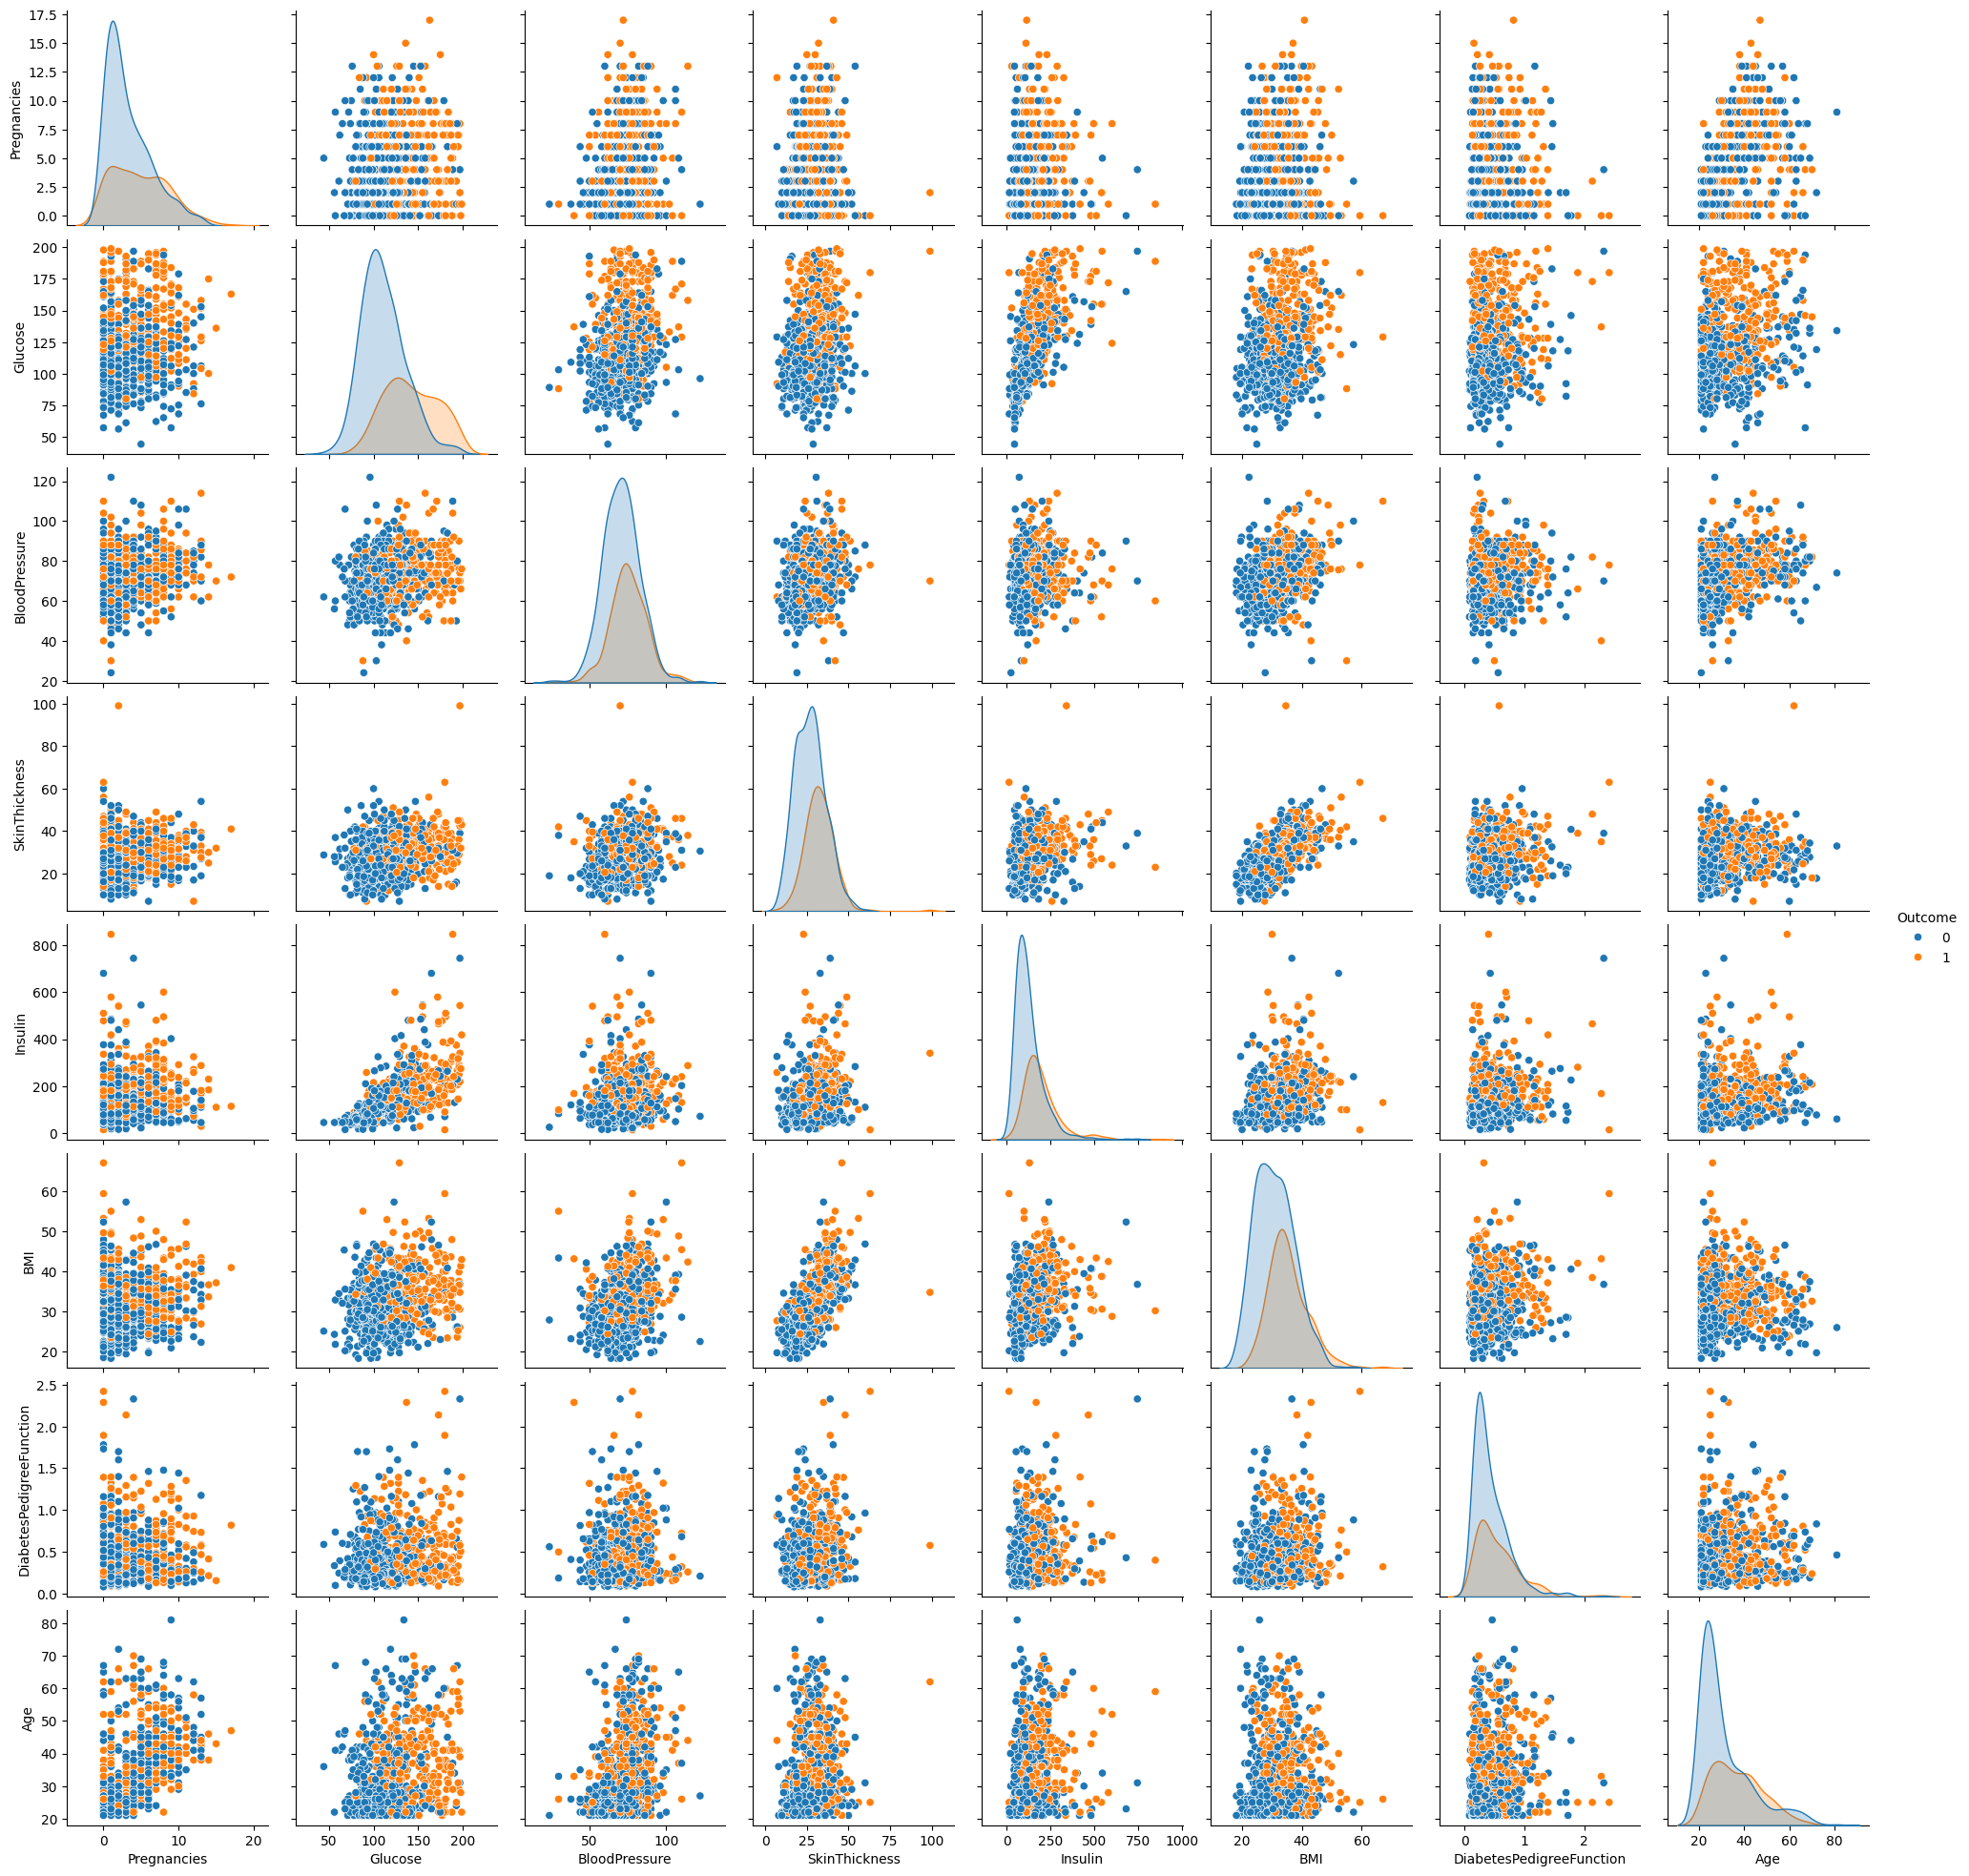

In [22]:
# Your code here...
# Using pairplot (with hue set to Outcome)
sns.pairplot(dataFramed, hue='Outcome', diag_kind='kde')
plt.show()


## 3. Baseline model

In [23]:
# Your code here... Note: it is pretty easy to get 100% accuracy on the training set with a decision tree model! 
# Therefore, we need a better way to measure generalizability while we are optimizing than using the test set 
# over and over (see below...)

In [24]:
# cross_val_scores={
#     'Model': [],
#     'Score': []
# }

# scores=cross_val_score(
#     DecisionTreeClassifier(random_state=315),
#     X_train,
#     y_train,
#     n_jobs=-1
# )

# cross_val_scores['Model'].extend(['Baseline']*len(scores))
# cross_val_scores['Score'].extend(scores)

# print(f'Cross-validation accuracy: {np.mean(scores)*100:.1f} +/- {np.std(scores)*100:.1f}%')

In [25]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate on training and test sets
model_train_acc = model.score(X_train, y_train)
model_test_acc = model.score(X_test, y_test)
print(f"Decision Tree -> Training Accuracy: {model_train_acc:.4f}, Testing Accuracy: {model_test_acc:.4f}")


Decision Tree -> Training Accuracy: 1.0000, Testing Accuracy: 0.7208


## 4. Hyperparameter optimization

### 4.1. Hyperparameter grid search

In [39]:
# Your code here...

# Define the grid of hyperparameters
param_grid = {
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.7459549513527922


### 4.2. Hyperparameter optimization results

                                               params  mean_test_score  \
25  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...         0.745955   
26  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...         0.745955   
24  {'max_depth': 5, 'min_samples_leaf': 10, 'min_...         0.745955   
20  {'max_depth': 5, 'min_samples_leaf': 1, 'min_s...         0.741050   
11  {'max_depth': 3, 'min_samples_leaf': 1, 'min_s...         0.739504   
16  {'max_depth': 3, 'min_samples_leaf': 10, 'min_...         0.739504   
15  {'max_depth': 3, 'min_samples_leaf': 10, 'min_...         0.739504   
17  {'max_depth': 3, 'min_samples_leaf': 10, 'min_...         0.739504   
23  {'max_depth': 5, 'min_samples_leaf': 5, 'min_s...         0.734520   
9   {'max_depth': 3, 'min_samples_leaf': 1, 'min_s...         0.731374   
10  {'max_depth': 3, 'min_samples_leaf': 1, 'min_s...         0.731374   
38  {'max_depth': 10, 'min_samples_leaf': 1, 'min_...         0.731334   
6   {'max_depth': None, 'min_samples_l

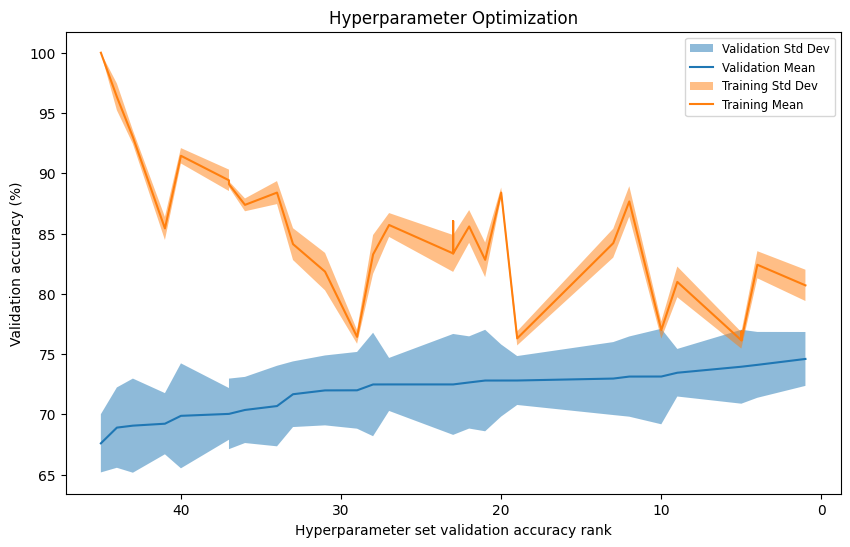

In [40]:
# 2. Visualize all hyperparameter combinations and their performance using a DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)
results_display = results_df[['params', 'mean_test_score', 'std_test_score']]
results_display = results_display.sort_values(by='mean_test_score', ascending=False)
print(results_display)

# Create a sorted DataFrame from the GridSearchCV results
results = pd.DataFrame(grid_search.cv_results_)
sorted_results = results.sort_values('rank_test_score').reset_index(drop=True)

plt.figure(figsize=(10, 6))
plt.title('Hyperparameter Optimization')
plt.xlabel('Hyperparameter set validation accuracy rank')
plt.ylabel('Validation accuracy (%)')
plt.gca().invert_xaxis()  # Invert if you want best ranks (smaller numbers) on the right

# Plot validation accuracy with standard deviation bounds
plt.fill_between(
    sorted_results['rank_test_score'],
    sorted_results['mean_test_score'] * 100 + sorted_results['std_test_score'] * 100,
    sorted_results['mean_test_score'] * 100 - sorted_results['std_test_score'] * 100,
    alpha=0.5,
    label='Validation Std Dev'
)
plt.plot(
    sorted_results['rank_test_score'],
    sorted_results['mean_test_score'] * 100,
    label='Validation Mean'
)

# Plot training accuracy with standard deviation bounds
plt.fill_between(
    sorted_results['rank_test_score'],
    sorted_results['mean_train_score'] * 100 + sorted_results['std_train_score'] * 100,
    sorted_results['mean_train_score'] * 100 - sorted_results['std_train_score'] * 100,
    alpha=0.5,
    label='Training Std Dev'
)
plt.plot(
    sorted_results['rank_test_score'],
    sorted_results['mean_train_score'] * 100,
    label='Training Mean'
)

plt.legend(loc='best', fontsize='small')
plt.show()


### 4.3. Cross-validation of optimized model

In [43]:
# Your code here...
# Get the best Decision Tree model from the grid search
best_model = grid_search.best_estimator_

# Cross-validation on the training set with the best estimator
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Optimized Decision Tree CV Accuracy: {:.4f} +/- {:.4f}".format(cv_scores.mean(), cv_scores.std()))


Optimized Decision Tree CV Accuracy: 0.7460 +/- 0.0224


## 5. Evaluation

### 5.1. Model comparison

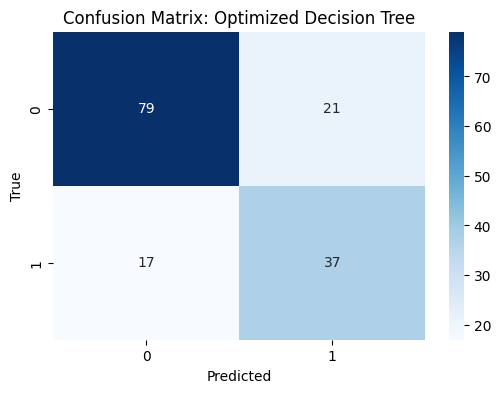

Classification Report for Optimized Decision Tree:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81       100
           1       0.64      0.69      0.66        54

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.76       154



In [45]:
# Your code here...

# Predictions from the optimized model
y_pred_model = best_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_model)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix: Optimized Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Detailed classification report
print("Classification Report for Optimized Decision Tree:")
print(classification_report(y_test, y_pred_model))


### 5.2. Test set performance

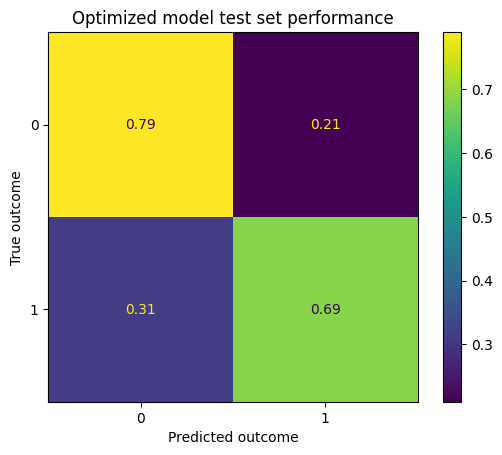

In [50]:
# Your code here...

# Plot the confusion matrix
cm=confusion_matrix(y_test, y_pred_model, normalize='true')
cm_disp=ConfusionMatrixDisplay(confusion_matrix=cm)
_=cm_disp.plot()

plt.title(f'Optimized model test set performance')
plt.xlabel('Predicted outcome')
plt.ylabel('True outcome')
plt.show()

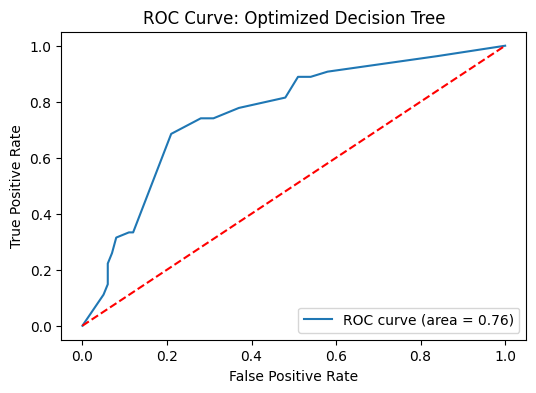

In [52]:
from sklearn.metrics import roc_curve, auc

# Obtain probability scores for ROC curve
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='r')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Optimized Decision Tree")
plt.legend(loc="lower right")
plt.show()


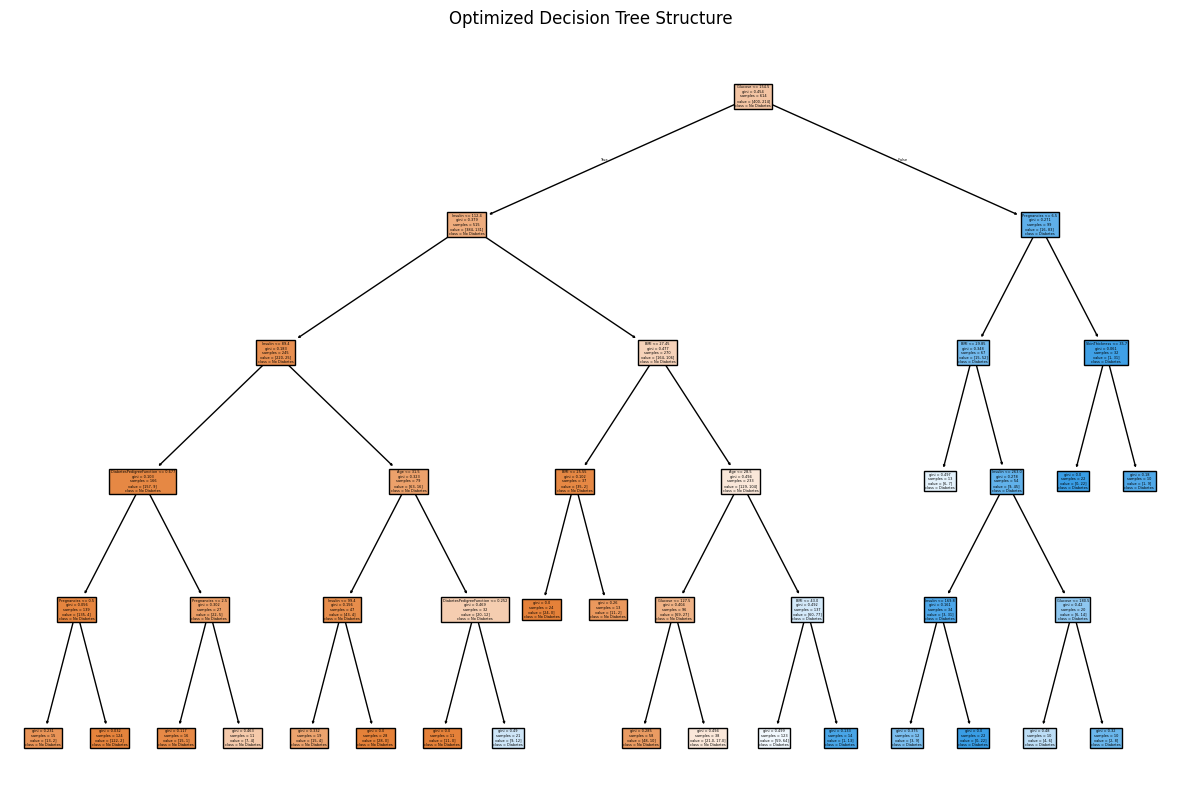

In [53]:
from sklearn import tree

plt.figure(figsize=(15,10))
tree.plot_tree(best_model, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'], filled=True)
plt.title("Optimized Decision Tree Structure")
plt.show()
